<a href="https://colab.research.google.com/github/swjh9523/Python_Tutorial/blob/master/mpg_data_anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


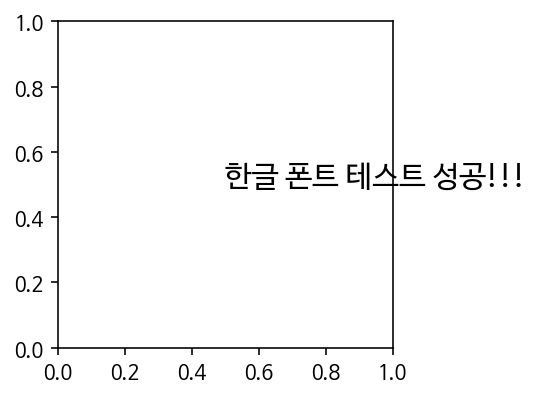

In [3]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
#!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [4]:
mpg = pd.read_csv('/content/drive/MyDrive/데이터파일/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.columns = ["제조회사","모델","배기량","생산연도","실린더 개수","변속기 종류","구동방식","도시연비","고속도로 연비","연료 종류","자동차 종류"]

In [6]:
mpg.columns

Index(['제조회사', '모델', '배기량', '생산연도', '실린더 개수', '변속기 종류', '구동방식', '도시연비',
       '고속도로 연비', '연료 종류', '자동차 종류'],
      dtype='object')

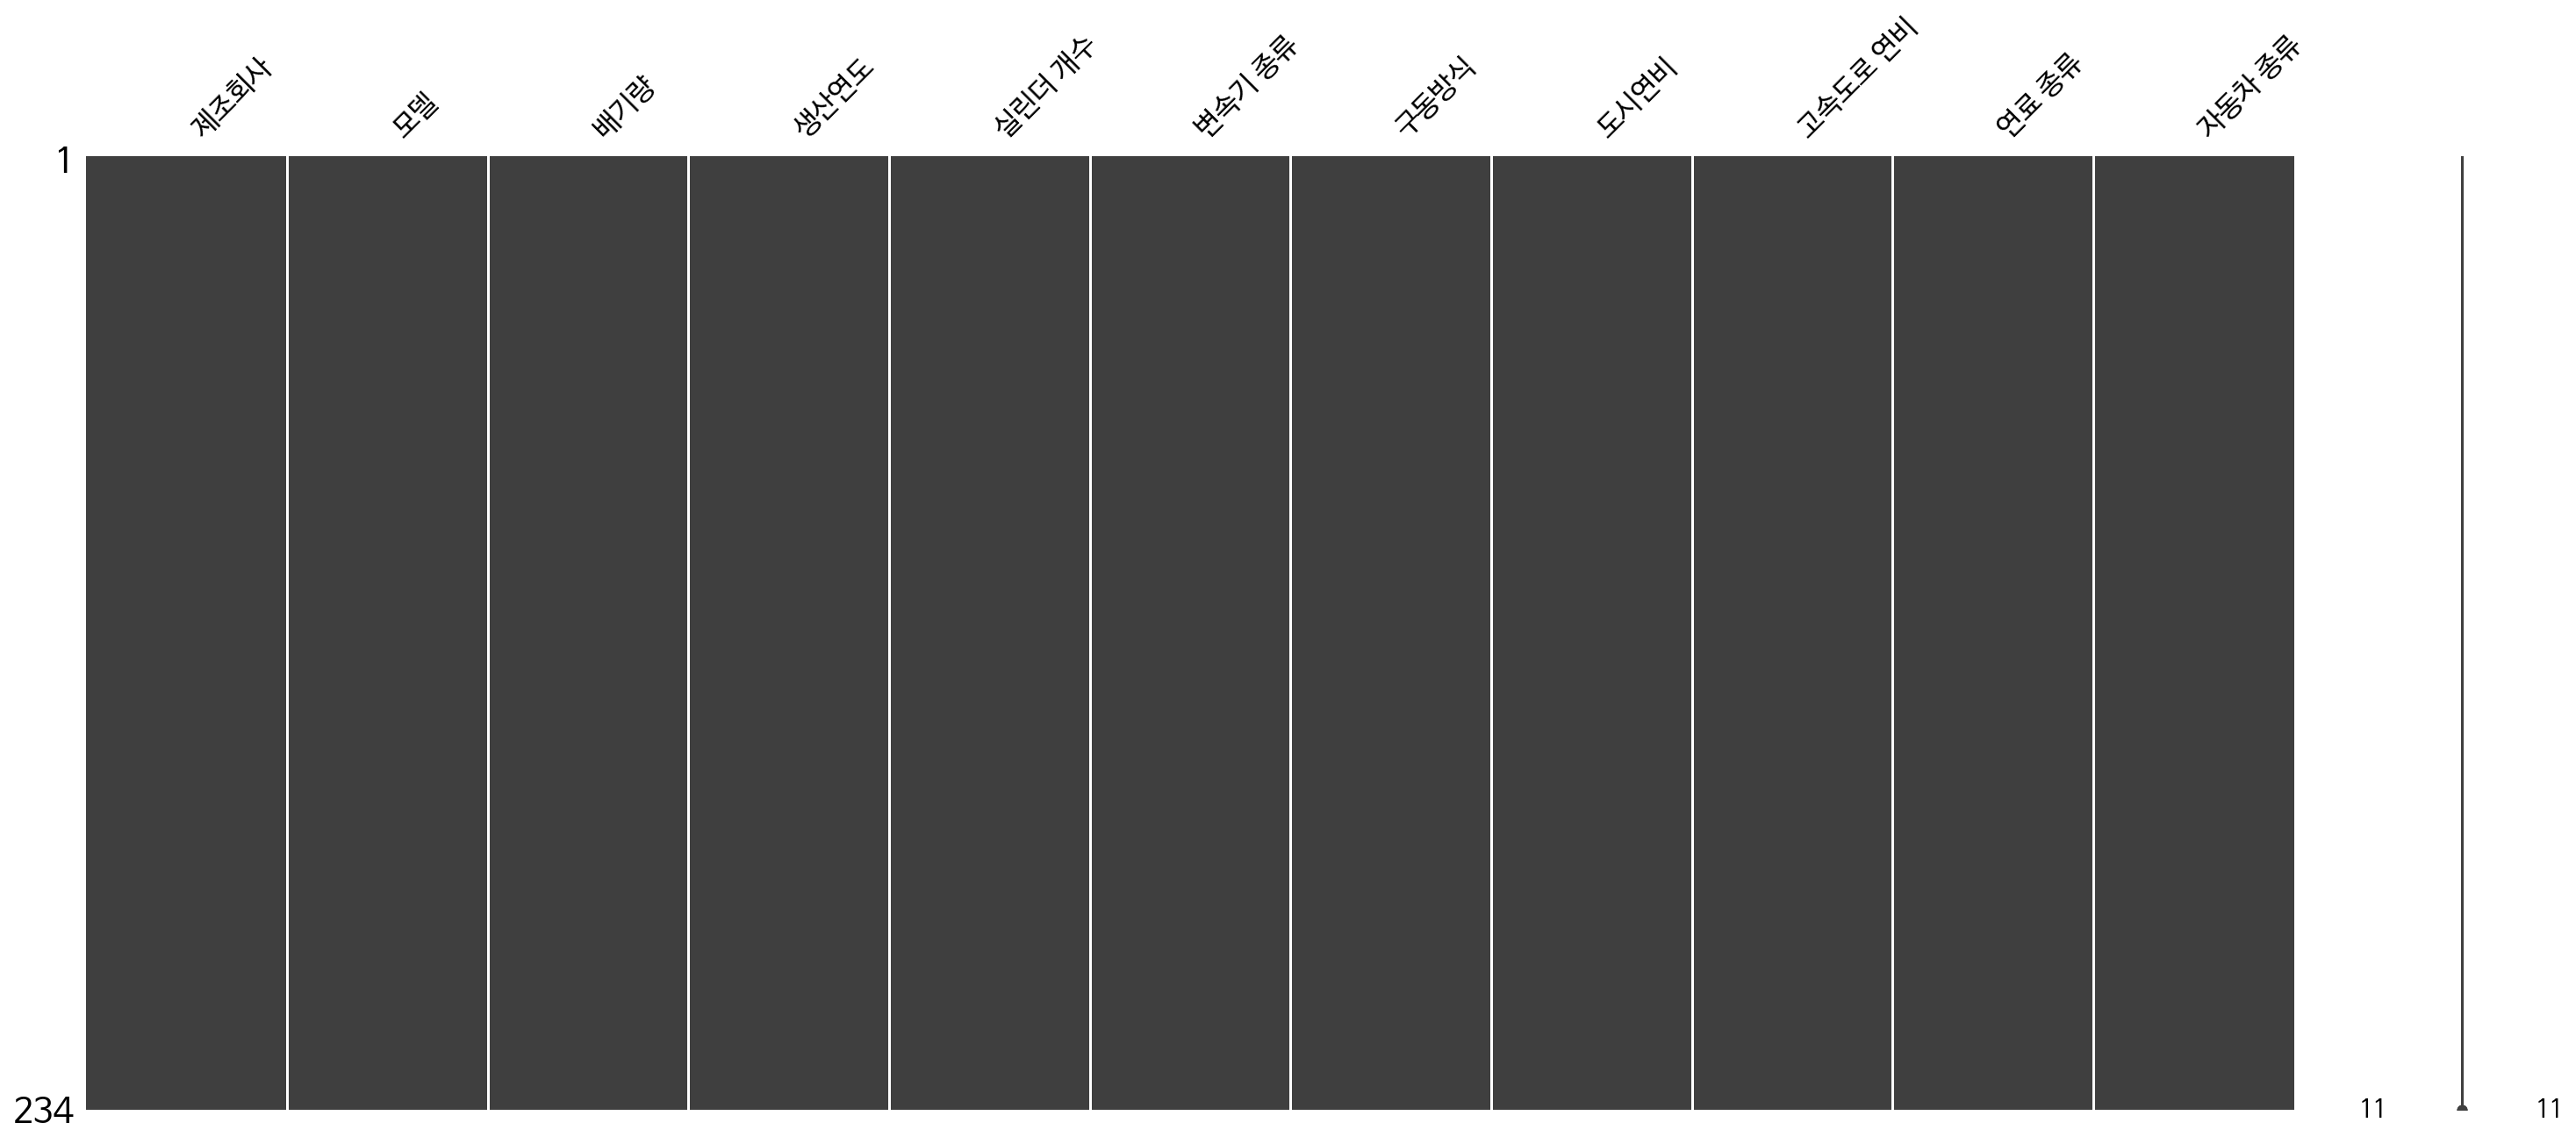

In [7]:
# 결측치 확인
import missingno
missingno.matrix(mpg)

## Q1 자동차 배기량에 따라 고속도로 연비가 다른지 알아보자
displ(배기량)이 4 이하인 자동차와 5 이상인 자동차 중 어떤 자동차의 hwy(연비)가 평균적으로 높은가?

In [8]:
mpg_under_4 = mpg[mpg["배기량"] <= 4].copy()
mpg_over_5 = mpg[mpg["배기량"] >= 5].copy()

In [9]:
print(mpg_under_4["고속도로 연비"].mean())
mpg_over_5["고속도로 연비"].mean()

25.96319018404908


18.07894736842105

In [10]:
# 변수에 저장하지않고 비교하기
print(mpg[mpg["배기량"] <= 4]["고속도로 연비"].mean())
mpg[mpg["배기량"] >= 5]["고속도로 연비"].mean()

25.96319018404908


18.07894736842105

In [11]:
# sns.scatterplot("total_bill", "tip", data=df, ax=ax[0])
# fig
# sns.stripplot("size", "tip", data=df, ax=ax[1])
# fig

## Q2. 자동차 제조 회사에 따라 도시 연비가 다른지 알아보자. "audi"와 "toyota" 중 어느 manufacturer의 cty가 평균적으로 높은지 알아 보자

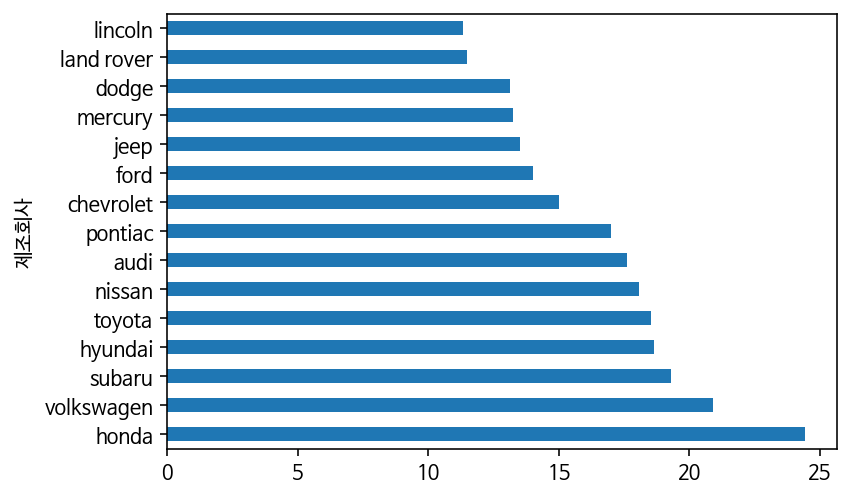

In [12]:
mpg.head()
mpg.groupby(["제조회사"])['도시연비'].mean().sort_values(ascending=False).plot.barh()

## Q3. "chevrolet", "ford", "honda" 자동차의 고속도로 연비 평균을 알아보자. 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 구해 보자.

In [13]:
mpg[mpg["제조회사"].str.contains('chevrolet|ford|honda')]['고속도로 연비'].mean()

22.50943396226415

## Q4. mpg 데이터에서 class(자동차 종류), cty(도시 연비) 변수를 추출해 새로운 데이터를 만들어라

In [14]:
mpg_class = mpg[["자동차 종류","도시연비"]].copy()
mpg_class.head(1)

,자동차 종류,도시연비
0,compact,18


## Q5. 자동차 종류에 따라 도시 연비가 다른지 알아보자. 앞에서 추출한 데이터로 class가 "suv"인 자동차와 "compact"인 자동차 중 어떤 자동차의 cty가 더 높은지 알아보자.

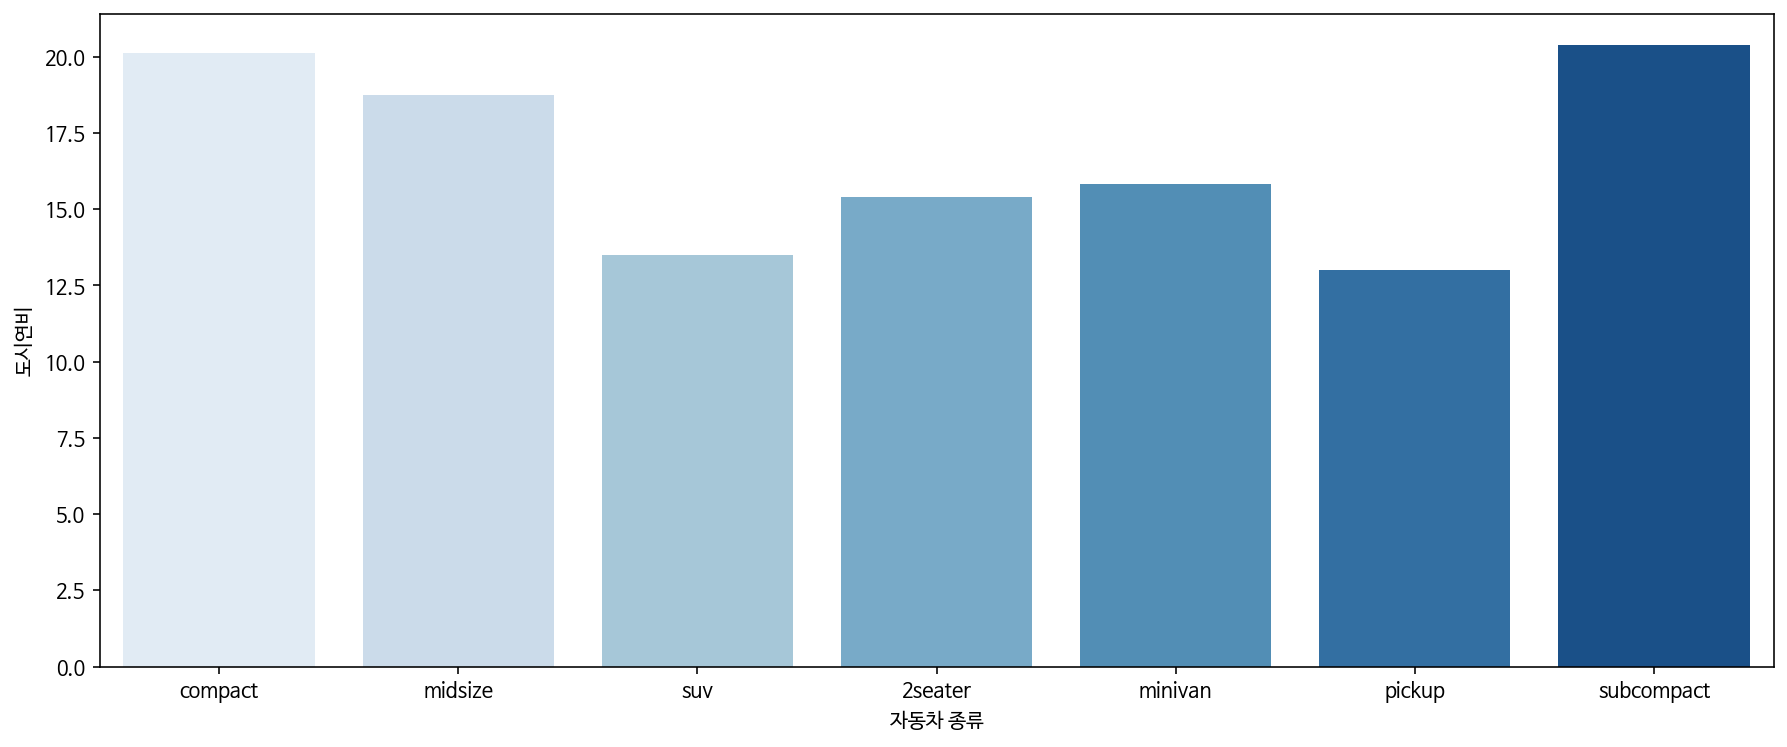

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(data=mpg_class, x='자동차 종류', y='도시연비',
            ci=None, palette="Blues")

In [16]:
mpg.groupby(["자동차 종류"])["도시연비"].describe()

,count,mean,std,min,25%,50%,75%,max
자동차 종류,,,,,,,,
2seater,5.0,15.400000,0.547723,15.0,15.0,15.0,16.00,16.0
compact,47.0,20.127660,3.385500,15.0,18.0,20.0,21.00,33.0
midsize,41.0,18.756098,1.946542,15.0,18.0,18.0,21.00,23.0
minivan,11.0,15.818182,1.834022,11.0,15.5,16.0,17.00,18.0
pickup,33.0,13.000000,2.046338,9.0,11.0,13.0,14.00,17.0
subcompact,35.0,20.371429,4.602338,14.0,17.0,19.0,23.50,35.0
suv,62.0,13.500000,2.420879,9.0,12.0,13.0,14.75,20.0


## Q6. "audi"에서 생산한 자동차 중 hwy가 높은 1~5위의 데이터를 출력하라.

In [17]:
mpg[mpg["제조회사"] == "audi"].sort_values(by="고속도로 연비", ascending=False).head()

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


## Q7. mpg() 데이터 복사본을 만들고, cty와 hwy를 더한 '합산 연비 변수'를 추가하라.

In [18]:
mpg2 = mpg.copy()
mpg2["합산 연비"] = mpg["도시연비"] + mpg["고속도로 연비"]
mpg2.head()

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,합산 연비
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42


## Q8. 합산 연비 변수를 2로 나눠 평균 연비 변수를 추가하라.

In [19]:
mpg2["평균 연비"] = mpg2["합산 연비"] / 2
mpg2.head()

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,합산 연비,평균 연비
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,21.0


## Q9. 평균 연비 변수가 가장 높은 자동차 3종의 데이터를 출력하라.


In [20]:
mpg2.sort_values(by="평균 연비", ascending=False).head(3)

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,합산 연비,평균 연비
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


## Q10. 위에 3문제를 하나의 코드로 만들어 보라.

In [21]:
mpg2 = mpg.copy()
mpg2["합산 연비"] = mpg["도시연비"] + mpg["고속도로 연비"]
mpg2["평균 연비"] = mpg2["합산 연비"] / 2
mpg2.sort_values(by="평균 연비", ascending=False).head(3)

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,합산 연비,평균 연비
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


## Q11. mpg 데이터의 class는 "suv", "compact" 등 자동차를 특징에 따라 일곱 종류로 분류한 변수이다. 어떤 차종의 도시 연비가 높은지 비교해보자. class별 cty 평균을 구해보자.

In [22]:
round(mpg.groupby(["자동차 종류"])["도시연비"].mean(),4)

자동차 종류
2seater       15.4000
compact       20.1277
midsize       18.7561
minivan       15.8182
pickup        13.0000
subcompact    20.3714
suv           13.5000
Name: 도시연비, dtype: float64

## Q12. 앞 문제의 출력 결과는 class 값 알파벳 순으로 정렬되어 있다. cty 평균이 높은 순으로 정렬해 출력하자.


In [23]:
mpg.groupby(["자동차 종류"])["도시연비"].mean().sort_values(ascending=False)

자동차 종류
subcompact    20.371429
compact       20.127660
midsize       18.756098
minivan       15.818182
2seater       15.400000
suv           13.500000
pickup        13.000000
Name: 도시연비, dtype: float64

## Q13. 어떤 회사 자동차의 hwy가 가장 높은지 알아보고 hwy 평균이 높은 회사 세 곳을 출력하자.

                    배기량    생산연도  실린더 개수  도시연비
제조회사       고속도로 연비                           
volkswagen 44       1.9  1999.0     4.0  34.0
           41       1.9  1999.0     4.0  29.0
toyota     37       1.8  2008.0     4.0  28.0


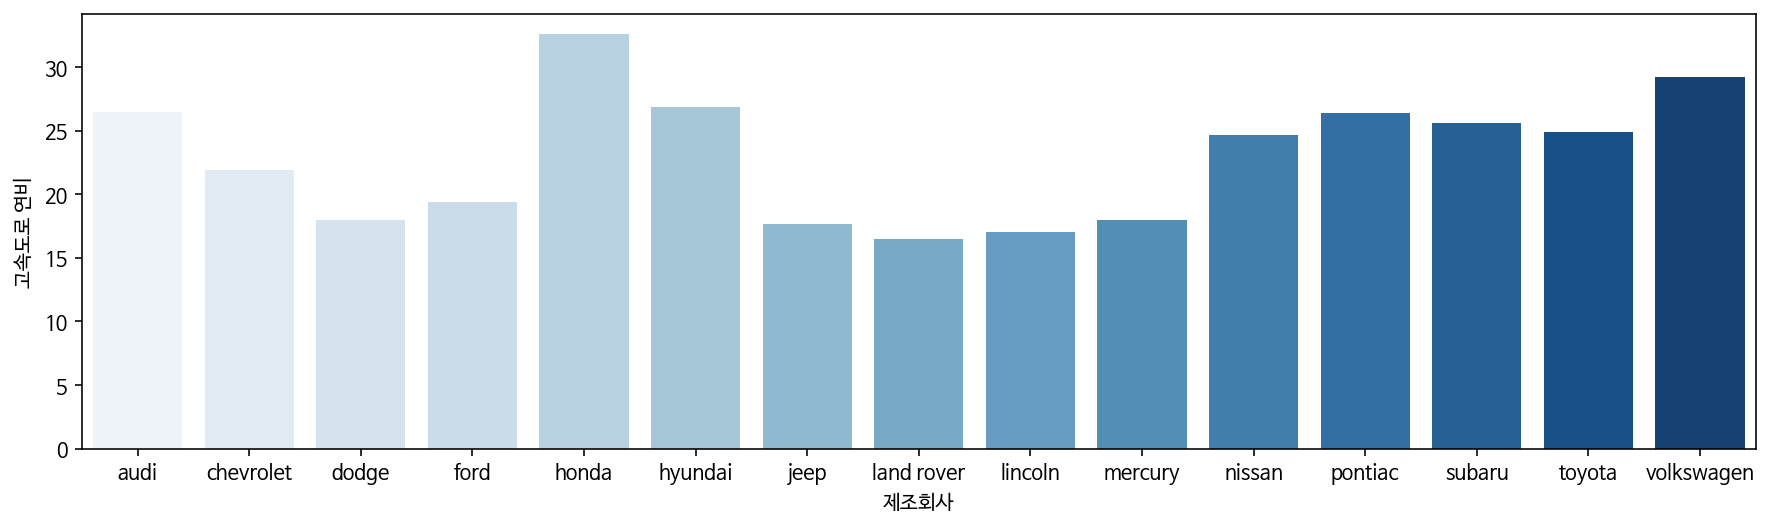

In [24]:
print(mpg.groupby(["제조회사", "고속도로 연비"]).mean().sort_values(by="고속도로 연비", ascending=False).head(3))
plt.figure(figsize=(15,4))
sns.barplot(data=mpg, x="제조회사",y="고속도로 연비",ci=None,palette="Blues")

## Q14. 어떤 회사에서 "compact" 차종을 가장 많이 생산하는지 알아보자. 각 회사별 "compact" 차종 수를 내림차순으로 정렬해 출력하자.

In [25]:
#mpg.groupby(["제조회사","자동차 종류"])[mpg[mpg["자동차 종류"]=="compact"]].count()
mpg[mpg["자동차 종류"] == "compact"].groupby(["제조회사"])["자동차 종류"].count().sort_values(ascending=False)

제조회사
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
Name: 자동차 종류, dtype: int64

## Q15. mpg 데이터에는 연료 종류를 나타낸 fl 변수는 있지만 연료 가격을 나타낸 변수는 없다. mpg 데이터에 price_fl를 추가하고 출력해보아라.

In [27]:
mpg_fuel = ['c','d','e','p','r']
price_fl = [2.35, 2.38, 2.11, 2.76, 2.22]
pr = pd.DataFrame(mpg_fuel, price_fl, columns=["연료 종류"]).reset_index()
pr.columns = ["연료 가격","연료 종류"]
pr = pr[["연료 종류", "연료 가격"]]
mpg1 = pd.merge(mpg, pr,on='연료 종류',how='left').copy()
mpg1.head()

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,연료 가격
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


In [47]:
# 잘됐는지 확인하기
mpg1[~(mpg1["연료 종류"] == 'p')]

,제조회사,모델,배기량,생산연도,실린더 개수,변속기 종류,구동방식,도시연비,고속도로 연비,연료 종류,자동차 종류,연료 가격
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,2.22
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv,2.11
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,2.22
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,2.22
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv,2.22
...,...,...,...,...,...,...,...,...,...,...,...,...
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.38
223,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,2.22
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact,2.22
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,2.22
